In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
import vectorbt as vbt
import yfinance as yf
from datetime import datetime

from sklearn.model_selection import (GridSearchCV, 
                                     TimeSeriesSplit,
                                     train_test_split)
from sklearn.metrics import (r2_score, 
                             mean_squared_error, 
                             mean_absolute_error, 
                             mean_absolute_percentage_error)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier)

In [3]:
start_date = datetime(2000,1,1)
end_date = datetime(2020,12,31)

In [5]:

data = pd.DataFrame()
data = data.ta.ticker('spy',start = start_date, end = end_date)

In [6]:
df = data.copy()

In [7]:
df = df[['Close']]
df.tail()

,Close
Date,
2020-12-23 00:00:00-05:00,356.944000
2020-12-24 00:00:00-05:00,358.332672
2020-12-28 00:00:00-05:00,361.411041
2020-12-29 00:00:00-05:00,360.721558
2020-12-30 00:00:00-05:00,361.236237


In [8]:
df.ta.macd(append=True) # Default 12,26,9
df.tail()

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,
2020-12-23 00:00:00-05:00,356.944000,3.782508,-0.641182,4.423691
2020-12-24 00:00:00-05:00,358.332672,3.665078,-0.606891,4.271968
2020-12-28 00:00:00-05:00,361.411041,3.776874,-0.396075,4.172949
2020-12-29 00:00:00-05:00,360.721558,3.766421,-0.325223,4.091644
2020-12-30 00:00:00-05:00,361.236237,3.756366,-0.268222,4.024588


In [9]:
window = 21
target_column = 'MACDh_12_26_9'
roll = df[target_column].rolling(window)
df['z-score-MACDh'] = (df[target_column] - roll.mean()) / roll.std()
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh
Date,,,,,
2000-01-03 00:00:00-05:00,95.308815,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,91.581650,NaN,NaN,NaN,NaN
2000-01-05 00:00:00-05:00,91.745491,NaN,NaN,NaN,NaN
2000-01-06 00:00:00-05:00,90.270996,NaN,NaN,NaN,NaN
2000-01-07 00:00:00-05:00,95.513596,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-23 00:00:00-05:00,356.944000,3.782508,-0.641182,4.423691,-1.358764
2020-12-24 00:00:00-05:00,358.332672,3.665078,-0.606891,4.271968,-1.174524
2020-12-28 00:00:00-05:00,361.411041,3.776874,-0.396075,4.172949,-0.669619


In [10]:
df['return_5d'] = df['Close'].shift(-5)/df['Close']-1
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d
Date,,,,,,
2000-01-03 00:00:00-05:00,95.308815,NaN,NaN,NaN,NaN,0.005587
2000-01-04 00:00:00-05:00,91.581650,NaN,NaN,NaN,NaN,0.033989
2000-01-05 00:00:00-05:00,91.745491,NaN,NaN,NaN,NaN,0.021875
2000-01-06 00:00:00-05:00,90.270996,NaN,NaN,NaN,NaN,0.052632
2000-01-07 00:00:00-05:00,95.513596,NaN,NaN,NaN,NaN,0.008362
...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,356.944000,3.782508,-0.641182,4.423691,-1.358764,NaN
2020-12-24 00:00:00-05:00,358.332672,3.665078,-0.606891,4.271968,-1.174524,NaN
2020-12-28 00:00:00-05:00,361.411041,3.776874,-0.396075,4.172949,-0.669619,NaN


In [11]:
df['signal'] = df.MACD_12_26_9 > df.MACDs_12_26_9
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal
Date,,,,,,,
2000-01-03 00:00:00-05:00,95.308815,NaN,NaN,NaN,NaN,0.005587,False
2000-01-04 00:00:00-05:00,91.581650,NaN,NaN,NaN,NaN,0.033989,False
2000-01-05 00:00:00-05:00,91.745491,NaN,NaN,NaN,NaN,0.021875,False
2000-01-06 00:00:00-05:00,90.270996,NaN,NaN,NaN,NaN,0.052632,False
2000-01-07 00:00:00-05:00,95.513596,NaN,NaN,NaN,NaN,0.008362,False
...,...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,356.944000,3.782508,-0.641182,4.423691,-1.358764,NaN,False
2020-12-24 00:00:00-05:00,358.332672,3.665078,-0.606891,4.271968,-1.174524,NaN,False
2020-12-28 00:00:00-05:00,361.411041,3.776874,-0.396075,4.172949,-0.669619,NaN,False


In [12]:
df['return_5d'] = df['return_5d'].shift(-1)
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal
Date,,,,,,,
2000-01-03 00:00:00-05:00,95.308815,NaN,NaN,NaN,NaN,0.033989,False
2000-01-04 00:00:00-05:00,91.581650,NaN,NaN,NaN,NaN,0.021875,False
2000-01-05 00:00:00-05:00,91.745491,NaN,NaN,NaN,NaN,0.052632,False
2000-01-06 00:00:00-05:00,90.270996,NaN,NaN,NaN,NaN,0.008362,False
2000-01-07 00:00:00-05:00,95.513596,NaN,NaN,NaN,NaN,-0.002992,False
...,...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,356.944000,3.782508,-0.641182,4.423691,-1.358764,NaN,False
2020-12-24 00:00:00-05:00,358.332672,3.665078,-0.606891,4.271968,-1.174524,NaN,False
2020-12-28 00:00:00-05:00,361.411041,3.776874,-0.396075,4.172949,-0.669619,NaN,False


In [13]:
 df.dropna(inplace=True)
df


,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal
Date,,,,,,,
2000-03-20 00:00:00-05:00,96.043800,0.820078,0.786843,0.033235,1.867541,0.012568,True
2000-03-21 00:00:00-05:00,98.014763,1.166830,0.906876,0.259954,1.920596,0.007495,True
2000-03-22 00:00:00-05:00,98.610168,1.472701,0.970197,0.502503,1.843016,-0.025998,True
2000-03-23 00:00:00-05:00,100.293686,1.829858,1.061884,0.767974,1.835670,-0.020757,True
2000-03-24 00:00:00-05:00,100.889076,2.136324,1.094680,1.041644,1.730607,-0.004525,True
...,...,...,...,...,...,...,...
2020-12-15 00:00:00-05:00,357.382202,4.545311,-0.553172,5.098483,-1.515809,-0.002791,False
2020-12-16 00:00:00-05:00,357.943085,4.525212,-0.458617,4.983829,-1.338208,-0.004478,False
2020-12-17 00:00:00-05:00,359.944672,4.617566,-0.293010,4.910576,-1.068212,0.008099,False


In [14]:
# Create boolean signals (TS_Entries, TS_Exits) for vectorbt
signal_vectorbt = df.ta.tsignals(df.signal, asbool = True, append = True)
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits
Date,,,,,,,,,,,
2000-03-20 00:00:00-05:00,96.043800,0.820078,0.786843,0.033235,1.867541,0.012568,True,True,0,False,False
2000-03-21 00:00:00-05:00,98.014763,1.166830,0.906876,0.259954,1.920596,0.007495,True,True,0,False,False
2000-03-22 00:00:00-05:00,98.610168,1.472701,0.970197,0.502503,1.843016,-0.025998,True,True,0,False,False
2000-03-23 00:00:00-05:00,100.293686,1.829858,1.061884,0.767974,1.835670,-0.020757,True,True,0,False,False
2000-03-24 00:00:00-05:00,100.889076,2.136324,1.094680,1.041644,1.730607,-0.004525,True,True,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15 00:00:00-05:00,357.382202,4.545311,-0.553172,5.098483,-1.515809,-0.002791,False,False,0,False,False
2020-12-16 00:00:00-05:00,357.943085,4.525212,-0.458617,4.983829,-1.338208,-0.004478,False,False,0,False,False
2020-12-17 00:00:00-05:00,359.944672,4.617566,-0.293010,4.910576,-1.068212,0.008099,False,False,0,False,False


In [15]:
df.describe()

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,TS_Trades
count,5224.000000,5224.000000,5224.000000,5224.000000,5224.000000,5224.000000,5224.000000
mean,137.037521,0.344504,0.003743,0.340761,-0.132779,0.001550,-0.000191
std,72.300571,1.825673,0.574574,1.704665,1.292867,0.025109,0.285926
min,51.957115,-22.485444,-5.846707,-18.818517,-3.812494,-0.197934,-1.000000
25%,84.225353,-0.354356,-0.210415,-0.311254,-1.181749,-0.009871,0.000000
50%,104.016602,0.467831,0.006393,0.444298,-0.160946,0.003334,0.000000
75%,181.382454,1.156903,0.229948,1.098010,0.907707,0.014732,0.000000
max,359.944672,8.847139,5.836940,7.439726,3.008264,0.194036,1.000000


<AxesSubplot:>

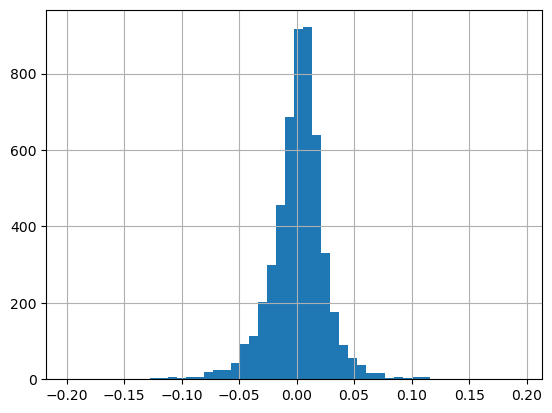

In [16]:
df['return_5d'].hist(bins = 50)

In [17]:
df['Warning Signal'] = np.where(df['return_5d']<-0.02, 'Warning', 'No Warning')
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,Warning Signal
Date,,,,,,,,,,,,
2000-03-20 00:00:00-05:00,96.043800,0.820078,0.786843,0.033235,1.867541,0.012568,True,True,0,False,False,No Warning
2000-03-21 00:00:00-05:00,98.014763,1.166830,0.906876,0.259954,1.920596,0.007495,True,True,0,False,False,No Warning
2000-03-22 00:00:00-05:00,98.610168,1.472701,0.970197,0.502503,1.843016,-0.025998,True,True,0,False,False,Warning
2000-03-23 00:00:00-05:00,100.293686,1.829858,1.061884,0.767974,1.835670,-0.020757,True,True,0,False,False,Warning
2000-03-24 00:00:00-05:00,100.889076,2.136324,1.094680,1.041644,1.730607,-0.004525,True,True,0,False,False,No Warning
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15 00:00:00-05:00,357.382202,4.545311,-0.553172,5.098483,-1.515809,-0.002791,False,False,0,False,False,No Warning
2020-12-16 00:00:00-05:00,357.943085,4.525212,-0.458617,4.983829,-1.338208,-0.004478,False,False,0,False,False,No Warning
2020-12-17 00:00:00-05:00,359.944672,4.617566,-0.293010,4.910576,-1.068212,0.008099,False,False,0,False,False,No Warning


In [18]:
(df['Warning Signal']=='Warning').sum()

741

In [19]:
df = df[df['TS_Trades']==1]
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,Warning Signal
Date,,,,,,,,,,,,
2000-05-15 00:00:00-04:00,95.448341,-0.581793,0.009520,-0.591313,1.174045,-0.059225,True,True,1,True,False,Warning
2000-05-31 00:00:00-04:00,93.826416,-0.676117,0.034700,-0.710818,0.864356,0.010968,True,True,1,True,False,No Warning
2000-07-10 00:00:00-04:00,97.360611,0.359204,0.033224,0.325979,-0.104403,0.010864,True,True,1,True,False,No Warning
2000-08-08 00:00:00-04:00,97.916245,-0.045410,0.089162,-0.134572,0.626324,0.008054,True,True,1,True,False,No Warning
2000-10-20 00:00:00-04:00,92.364952,-1.588910,0.074297,-1.663207,2.142883,0.000000,True,True,1,True,False,No Warning
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-08 00:00:00-04:00,304.517365,3.216986,0.168316,3.048670,0.927441,0.020389,True,True,1,True,False,No Warning
2020-08-03 00:00:00-04:00,316.662262,4.104849,0.003162,4.101687,-0.601106,0.008301,True,True,1,True,False,No Warning
2020-08-24 00:00:00-04:00,330.271057,5.181698,0.051087,5.130611,-0.355470,0.024643,True,True,1,True,False,No Warning


In [20]:
my_features = ['MACD_12_26_9', 'MACDs_12_26_9','z-score-MACDh','TS_Trades']
X = df[my_features]
y = df['Warning Signal']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
%%time
rf_params = {'n_estimators': [100, 200, 300, 400, 500],  
            'max_depth': np.arange(2, 25, 1),   
            'min_samples_leaf': [10,100],  
            'bootstrap': [True, False], 
            'max_features': [1, 2, 3, 4]
            }


tscv = TimeSeriesSplit(n_splits = 5)
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=tscv, n_jobs=-1)
grid_result = rf_clf.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.8307692307692308
Best Params:  {'bootstrap': True, 'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 10, 'n_estimators': 100}
CPU times: user 34.5 s, sys: 1.81 s, total: 36.3 s
Wall time: 8min 11s


In [24]:

clf = RandomForestClassifier(bootstrap=True, 
                             max_depth=2, 
                             max_features=1, 
                             min_samples_leaf=10, 
                             n_estimators=100, 
                             random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import (mean_squared_error, 
                             r2_score, 
                             mean_absolute_error,
                             mean_absolute_percentage_error, 
                             plot_confusion_matrix, 
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score)

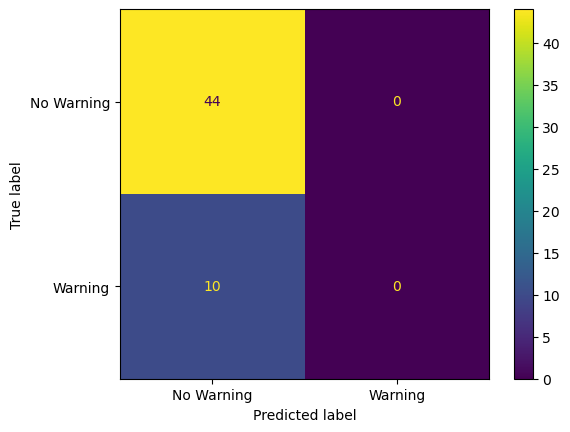

In [26]:
plot_confusion_matrix(clf, X_test, y_test)

In [27]:
accuracy_score(y_test, y_pred)

0.8148148148148148

In [28]:
precision_score(y_test, y_pred, pos_label='Warning')

0.0

In [29]:
recall_score(y_test, y_pred, pos_label='Warning')

0.0

In [30]:
f1_score(y_test, y_pred, pos_label='Warning')

0.0

# predict with real data

In [31]:
start_date = datetime(2020,10,31)
end_date = datetime(2022,9,23)

In [32]:
data = pd.DataFrame()
data = data.ta.ticker('spy',start = start_date, end = end_date)

In [33]:
df = data.copy()
df = df[['Close']]
df.tail()

,Close
Date,
2022-09-16 00:00:00-04:00,383.797607
2022-09-19 00:00:00-04:00,386.773926
2022-09-20 00:00:00-04:00,382.334320
2022-09-21 00:00:00-04:00,375.664948
2022-09-22 00:00:00-04:00,372.509430


In [34]:
df.ta.macd(append=True) # Default 12,26,9
df.tail()

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,
2022-09-16 00:00:00-04:00,383.797607,-4.277785,-1.670686,-2.607100
2022-09-19 00:00:00-04:00,386.773926,-4.536338,-1.543391,-2.992948
2022-09-20 00:00:00-04:00,382.334320,-5.041368,-1.638737,-3.402632
2022-09-21 00:00:00-04:00,375.664948,-5.911625,-2.007195,-3.904430
2022-09-22 00:00:00-04:00,372.509430,-6.777804,-2.298699,-4.479105


In [35]:
window = 21
target_column = 'MACDh_12_26_9'
roll = df[target_column].rolling(window)
df['z-score-MACDh'] = (df[target_column] - roll.mean()) / roll.std()
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh
Date,,,,,
2020-11-02 00:00:00-05:00,319.293304,NaN,NaN,NaN,NaN
2020-11-03 00:00:00-05:00,324.930725,NaN,NaN,NaN,NaN
2020-11-04 00:00:00-05:00,332.192657,NaN,NaN,NaN,NaN
2020-11-05 00:00:00-05:00,338.671356,NaN,NaN,NaN,NaN
2020-11-06 00:00:00-05:00,338.594025,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-16 00:00:00-04:00,383.797607,-4.277785,-1.670686,-2.607100,0.216134
2022-09-19 00:00:00-04:00,386.773926,-4.536338,-1.543391,-2.992948,0.439834
2022-09-20 00:00:00-04:00,382.334320,-5.041368,-1.638737,-3.402632,0.493493


In [36]:
df['return_5d'] = df['Close'].shift(-5)/df['Close']-1
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d
Date,,,,,,
2020-11-02 00:00:00-05:00,319.293304,NaN,NaN,NaN,NaN,0.073773
2020-11-03 00:00:00-05:00,324.930725,NaN,NaN,NaN,NaN,0.053596
2020-11-04 00:00:00-05:00,332.192657,NaN,NaN,NaN,NaN,0.038220
2020-11-05 00:00:00-05:00,338.671356,NaN,NaN,NaN,NaN,0.008480
2020-11-06 00:00:00-05:00,338.594025,NaN,NaN,NaN,NaN,0.022675
...,...,...,...,...,...,...
2022-09-16 00:00:00-04:00,383.797607,-4.277785,-1.670686,-2.607100,0.216134,NaN
2022-09-19 00:00:00-04:00,386.773926,-4.536338,-1.543391,-2.992948,0.439834,NaN
2022-09-20 00:00:00-04:00,382.334320,-5.041368,-1.638737,-3.402632,0.493493,NaN


In [37]:
df['signal'] = df.MACD_12_26_9 > df.MACDs_12_26_9
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal
Date,,,,,,,
2020-11-02 00:00:00-05:00,319.293304,NaN,NaN,NaN,NaN,0.073773,False
2020-11-03 00:00:00-05:00,324.930725,NaN,NaN,NaN,NaN,0.053596,False
2020-11-04 00:00:00-05:00,332.192657,NaN,NaN,NaN,NaN,0.038220,False
2020-11-05 00:00:00-05:00,338.671356,NaN,NaN,NaN,NaN,0.008480,False
2020-11-06 00:00:00-05:00,338.594025,NaN,NaN,NaN,NaN,0.022675,False
...,...,...,...,...,...,...,...
2022-09-16 00:00:00-04:00,383.797607,-4.277785,-1.670686,-2.607100,0.216134,NaN,False
2022-09-19 00:00:00-04:00,386.773926,-4.536338,-1.543391,-2.992948,0.439834,NaN,False
2022-09-20 00:00:00-04:00,382.334320,-5.041368,-1.638737,-3.402632,0.493493,NaN,False


In [38]:
df['return_5d'] = df['return_5d'].shift(-1)
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal
Date,,,,,,,
2020-11-02 00:00:00-05:00,319.293304,NaN,NaN,NaN,NaN,0.053596,False
2020-11-03 00:00:00-05:00,324.930725,NaN,NaN,NaN,NaN,0.038220,False
2020-11-04 00:00:00-05:00,332.192657,NaN,NaN,NaN,NaN,0.008480,False
2020-11-05 00:00:00-05:00,338.671356,NaN,NaN,NaN,NaN,0.022675,False
2020-11-06 00:00:00-05:00,338.594025,NaN,NaN,NaN,NaN,0.022591,False
...,...,...,...,...,...,...,...
2022-09-16 00:00:00-04:00,383.797607,-4.277785,-1.670686,-2.607100,0.216134,NaN,False
2022-09-19 00:00:00-04:00,386.773926,-4.536338,-1.543391,-2.992948,0.439834,NaN,False
2022-09-20 00:00:00-04:00,382.334320,-5.041368,-1.638737,-3.402632,0.493493,NaN,False


In [39]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 417 entries, 2021-01-20 00:00:00-05:00 to 2022-09-14 00:00:00-04:00
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          417 non-null    float64
 1   MACD_12_26_9   417 non-null    float64
 2   MACDh_12_26_9  417 non-null    float64
 3   MACDs_12_26_9  417 non-null    float64
 4   z-score-MACDh  417 non-null    float64
 5   return_5d      417 non-null    float64
 6   signal         417 non-null    bool   
dtypes: bool(1), float64(6)
memory usage: 23.2 KB


In [40]:
# Create boolean signals (TS_Entries, TS_Exits) for vectorbt
signal_vectorbt = df.ta.tsignals(df.signal, asbool = True, append = True)
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits
Date,,,,,,,,,,,
2021-01-20 00:00:00-05:00,372.792236,4.345028,0.040787,4.304241,0.800200,-0.017203,True,True,0,False,False
2021-01-21 00:00:00-05:00,373.132080,4.542853,0.190889,4.351964,1.079867,-0.033457,True,True,0,False,False
2021-01-22 00:00:00-05:00,371.811371,4.540718,0.151003,4.389714,0.889086,-0.021229,True,True,0,False,False
2021-01-25 00:00:00-05:00,373.277771,4.604276,0.171649,4.432627,0.860668,-0.005836,True,True,0,False,False
2021-01-26 00:00:00-05:00,372.695099,4.555121,0.097996,4.457126,0.593943,0.019871,True,True,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08 00:00:00-04:00,396.919373,-3.340959,-2.522286,-0.818674,-0.581811,-0.047851,False,False,0,False,False
2022-09-09 00:00:00-04:00,403.085602,-2.704852,-1.508943,-1.195909,-0.079509,-0.050670,False,False,0,False,False
2022-09-12 00:00:00-04:00,407.417847,-1.830061,-0.507321,-1.322740,0.432248,-0.018907,False,False,0,False,False


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 417 entries, 2021-01-20 00:00:00-05:00 to 2022-09-14 00:00:00-04:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          417 non-null    float64
 1   MACD_12_26_9   417 non-null    float64
 2   MACDh_12_26_9  417 non-null    float64
 3   MACDs_12_26_9  417 non-null    float64
 4   z-score-MACDh  417 non-null    float64
 5   return_5d      417 non-null    float64
 6   signal         417 non-null    bool   
 7   TS_Trends      417 non-null    bool   
 8   TS_Trades      417 non-null    int64  
 9   TS_Entries     417 non-null    bool   
 10  TS_Exits       417 non-null    bool   
dtypes: bool(4), float64(6), int64(1)
memory usage: 27.7 KB


In [42]:
df['Warning Signal'] = np.where(df['return_5d']<-0.02, 'Warning', 'No Warning')
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,Warning Signal
Date,,,,,,,,,,,,
2021-01-20 00:00:00-05:00,372.792236,4.345028,0.040787,4.304241,0.800200,-0.017203,True,True,0,False,False,No Warning
2021-01-21 00:00:00-05:00,373.132080,4.542853,0.190889,4.351964,1.079867,-0.033457,True,True,0,False,False,Warning
2021-01-22 00:00:00-05:00,371.811371,4.540718,0.151003,4.389714,0.889086,-0.021229,True,True,0,False,False,Warning
2021-01-25 00:00:00-05:00,373.277771,4.604276,0.171649,4.432627,0.860668,-0.005836,True,True,0,False,False,No Warning
2021-01-26 00:00:00-05:00,372.695099,4.555121,0.097996,4.457126,0.593943,0.019871,True,True,0,False,False,No Warning
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08 00:00:00-04:00,396.919373,-3.340959,-2.522286,-0.818674,-0.581811,-0.047851,False,False,0,False,False,Warning
2022-09-09 00:00:00-04:00,403.085602,-2.704852,-1.508943,-1.195909,-0.079509,-0.050670,False,False,0,False,False,Warning
2022-09-12 00:00:00-04:00,407.417847,-1.830061,-0.507321,-1.322740,0.432248,-0.018907,False,False,0,False,False,No Warning


In [43]:
df = df[df['TS_Trades']==1]
df

,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,z-score-MACDh,return_5d,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,Warning Signal
Date,,,,,,,,,,,,
2021-02-05 00:00:00-05:00,376.501770,3.107940,0.135730,2.972209,0.618294,0.004584,True,True,1,True,False,No Warning
2021-03-11 00:00:00-05:00,382.153534,1.196947,0.141802,1.055145,0.691621,-0.008385,True,True,1,True,False,No Warning
2021-03-26 00:00:00-04:00,385.792145,2.102716,0.013619,2.089096,0.350306,0.026126,True,True,1,True,False,No Warning
2021-05-27 00:00:00-04:00,408.502411,1.906413,0.050805,1.855608,1.586252,0.005119,True,True,1,True,False,No Warning
2021-06-25 00:00:00-04:00,416.993835,2.248105,0.179385,2.068721,0.516089,0.012773,True,True,1,True,False,No Warning
2021-07-26 00:00:00-04:00,431.079041,3.533296,0.237484,3.295812,-0.009089,0.004875,True,True,1,True,False,No Warning
2021-08-06 00:00:00-04:00,432.515900,3.414368,0.002548,3.411820,-0.058402,0.010947,True,True,1,True,False,No Warning
2021-08-11 00:00:00-04:00,433.776825,3.432065,0.021148,3.410916,0.249995,-0.011795,True,True,1,True,False,No Warning
2021-08-25 00:00:00-04:00,438.791199,3.085730,0.066053,3.019677,0.520969,0.015529,True,True,1,True,False,No Warning


In [44]:
my_features = ['MACD_12_26_9', 'MACDs_12_26_9','z-score-MACDh','TS_Trades']
X = df[my_features]
y = df['Warning Signal']

In [45]:
clf = RandomForestClassifier(bootstrap=True, 
                             max_depth=2, 
                             max_features=1, 
                             min_samples_leaf=10, 
                             n_estimators=100, 
                             random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X)

In [46]:
from sklearn.metrics import (mean_squared_error, 
                             r2_score, 
                             mean_absolute_error,
                             mean_absolute_percentage_error, 
                             plot_confusion_matrix, 
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score)

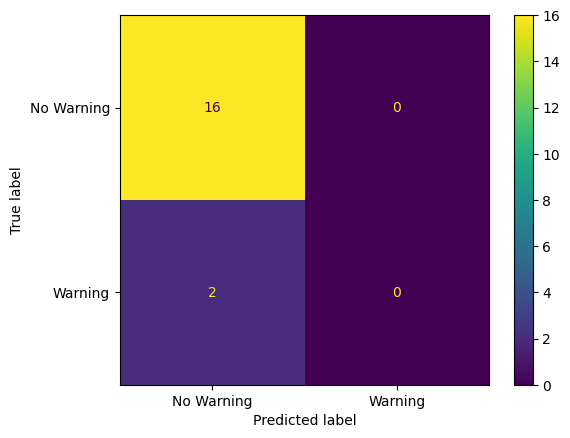

In [47]:
plot_confusion_matrix(clf, X, y)

In [48]:
accuracy_score(y, y_pred)

0.8888888888888888